<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Gaussian-Naive-Bayes/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes

Naive Bayes is a classification algorithm suitable for binary and multiclass classification. This is the extention of Naive Bayes which allows us working with real-valued attributes by assuming them in Gaussian (Normal) distribution which is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data [1].

In Naive Bayes, the probabilities for input values for each class are calculated using frequencies. With real-valued inputs, we can calculate the mean and standard deviation of input values ($x$) for each class to summarize the distribution.

There are 2 steps to apply Gaussian Naive Bayes as regular Naive Bayes. Those are:
1. Calculating the probabilities for each class
2. Calculating the conditional probabilities but this time using the Gaussian Probability Density Function (PDF).


## Table of Contents
1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Gaussian Probability Density Function](#pdf)
4. [Load Sample Data](#sampledata)
5. [Using Sklearn Library](#sklearn)
6. [Real Data](#realdata)

## Introduction<a id='introduction'></a>

The purpose of this study is to learn how Gaussian Naive Bayes works. We'll make manual an implementation of it to have a deep understanding, then use `GaussianNB` function of `sklearn` library. Finally, we'll train and make predictions on well-known Iris dataset.

## Import Libraries<a id='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math as m
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

## Gaussian Probability Density Function (PDF)<a id='pdf'></a>

In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable [2]. The general form of its probability density function is

$$pdf(x, \mu, \sigma) = \frac{1}{\sigma \times \sqrt{2 \times \pi}} \times e^{-(\frac{(x-\mu)^2}{2 \times \sigma^2})}$$

Where $pdf(x)$ is the Gaussian PDF, $\mu$ and $\sigma$ are the mean and standard deviation calculated, $\pi$ is the numerical constant PI, $e$ is the numerical constant Euler’s number raised to power and $x$ is the input value for the input variable. $\mu$ and $\sigma$ can be calculated as follow:

$$\mu = \frac{1}{n} \times \sum_{i=1}^nx_i$$

$$\sigma = \sqrt{\frac{1}{n} \times \sum_{i=1}^n(x_i - μ)^2}$$

In [2]:
# Creating a sample array
x = np.arange(-5, 6, 1)

# Setting the mean and standard deviation
mean = 0
std = 1

# Manually calculating PDF
pdf_x = []

for i in x:
  a = (1 / (np.sqrt(2*m.pi)*std)) * np.exp(-1 * (np.square(i-mean) / (2*np.square(std))))
  pdf_x.append(a)

pdf_x

[1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06]

<Axes: ylabel='Density'>

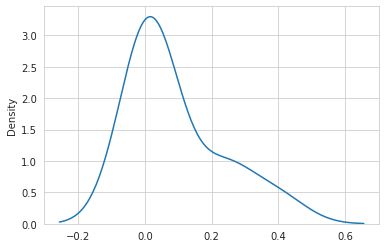

In [3]:
# Displaying the PDF graph for the sample array
sb.kdeplot(pdf_x)

<Axes: ylabel='Density'>

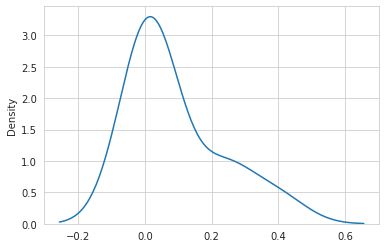

In [4]:
# Calculating PDF using Scipystats library
from scipy.stats import norm
sb.kdeplot(norm.pdf(x, mean, std))

## Load Sample Data <a id='sampledata'></a>

The data has 2 real-valued attributes (numeric features) and 1 categorical label. Gaussian Naive Bayes can handle numeric features unlike the Naive Bayes.

In [5]:
# Creating inputs
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]
x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]

# Creating label
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Converting them into dataframe
df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


<Axes: xlabel='x1', ylabel='x2'>

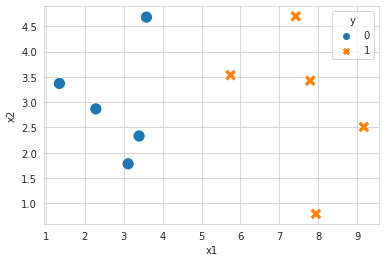

In [6]:
# Displaying scatterplot of the data
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)

## Make Predictions with Gaussian Naive Bayes Model <a id='prediction'></a>

First, the PDF of each input for each label are calcualted separately. PDF is calculated as described in the [above](#pdf) section. Then the conditional probability is calculated as shown below.

$$y_i = P(pdf(x_1) | y = i)... \times ...P(pdf(x_p) | y = i) \times P(y = i)$$


In [7]:
# Calculate Class Probabilities
y_0 = len(df[df['y'] == 0]) / len(df['y'])
y_1 = len(df[df['y'] == 1]) / len(df['y'])

print('Class probability of y=0: ', y_0)
print('Class probability of y=1: ', y_1)

Class probability of y=0:  0.5
Class probability of y=1:  0.5


In [8]:
# Calculate mean of each feature for each label
x1_y0_mean = df['x1'][df['y'] == 0].mean()
x1_y1_mean = df['x1'][df['y'] == 1].mean()
x2_y0_mean = df['x2'][df['y'] == 0].mean()
x2_y1_mean = df['x2'][df['y'] == 1].mean()

# Calculate standard deviation of each feature for each label
x1_y0_std = df['x1'][df['y'] == 0].std()
x1_y1_std = df['x1'][df['y'] == 1].std()
x2_y0_std = df['x2'][df['y'] == 0].std()
x2_y1_std = df['x2'][df['y'] == 1].std()

In [9]:
# Creata copy of the dataframe
df_pred = df.copy()

# Calculate PDF of each feature for each label
df_pred['pdf_x1_y0'] = norm.pdf(df_pred['x1'], x1_y0_mean, x1_y0_std)
df_pred['pdf_x2_y0'] = norm.pdf(df_pred['x2'], x2_y0_mean, x2_y0_std)
df_pred['pdf_x1_y1'] = norm.pdf(df_pred['x1'], x1_y1_mean, x1_y1_std)
df_pred['pdf_x2_y1'] = norm.pdf(df_pred['x2'], x2_y1_mean, x2_y1_std)

# Calculate conditional probability of each label
df_pred['out_y0'] = df_pred['pdf_x1_y0'] * df_pred['pdf_x2_y0'] * y_0
df_pred['out_y1'] = df_pred['pdf_x1_y1'] * df_pred['pdf_x2_y1'] * y_1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02


In [10]:
df_pred['Prediction'] = ''
df_pred.loc[df_pred['out_y0'] > df_pred['out_y1'], 'Prediction'] = 0
df_pred.loc[df_pred['out_y0'] <= df_pred['out_y1'], 'Prediction'] = 1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1,Prediction
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04,0
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05,0
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07,0
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04,0
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06,0
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02,1
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02,1
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02,1
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02,1
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02,1


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
acc = accuracy_score(df_pred['y'].values, df_pred['Prediction'].astype(int).values)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


## Using Sklearn Library <a id='sklearn'></a>

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model = GaussianNB()
x = df.drop('y', axis=1)
y = df['y']
model.fit(x, y)
y_hat = model.predict(x)

acc = accuracy_score(y, y_hat)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


🔎 As it can be seen, we had the same accuracy score for both the `sklearn` library and manual implementation for the predicting the sample dataset.

## Real Data<a id='realdata'></a>

We'll classify the flowers in **Iris dataset** using `GaussianNB` from `sklearn` library.

In [15]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
desc_cols = ['count','min', 'max', 'mean', 'std', 'unique', 'top', 'freq']
dataset.describe(include='all').loc[desc_cols].transpose()

,count,min,max,mean,std,unique,top,freq
sepal-length,150.0,4.3,7.9,5.843333,0.828066,NaN,NaN,NaN
sepal-width,150.0,2.0,4.4,3.054,0.433594,NaN,NaN,NaN
petal-length,150.0,1.0,6.9,3.758667,1.76442,NaN,NaN,NaN
petal-width,150.0,0.1,2.5,1.198667,0.763161,NaN,NaN,NaN
Class,150,NaN,NaN,NaN,NaN,3,Iris-setosa,50


In [17]:
# Let's get some more information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Preparing Data For Naive Bayes

- If the input variables are real-valued, a **Gaussian distribution** is assumed. In which case the algorithm will perform better if the univariate distributions of your data are Gaussian or near-Gaussian. This may require removing outliers (e g. values that are more than 3 or 4 standard deviations from the mean).
- The calculation of the likelihood of different class values involves multiplying a lot of small numbers together. This can lead to an underflow of numerical precision. As such it is good practice to use a **log transform** of the probabilities to avoid this underflow.
- Rather than assuming a Gaussian distribution for numerical input values, more complex distributions can be used such as a variety of **kernel density functions**.

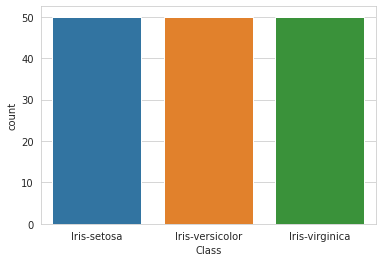

In [18]:
# Checking the distribution of label
sb.countplot(x=dataset['Class'])
plt.show()

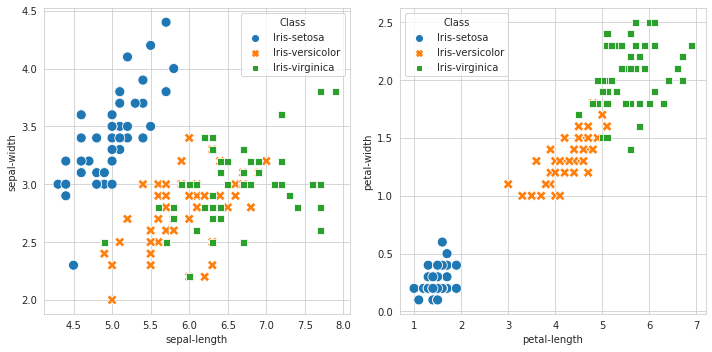

In [19]:
# Checking the relation between the label and the numerical features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.scatterplot(ax=axes[0], data=dataset, x='sepal-length', y='sepal-width', hue='Class', style='Class', s=100)
sb.scatterplot(ax=axes[1], data=dataset, x='petal-length', y='petal-width', hue='Class', style='Class', s=100)
plt.tight_layout()
plt.show()

In [20]:
# Mapping string values to numeric values
dataset.replace({'Class': {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}}, inplace=True)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking numerical features

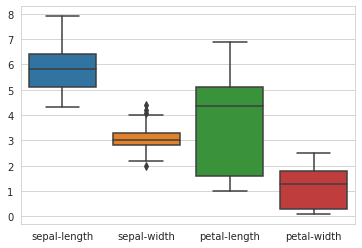

In [21]:
# Checking if there are any outliers amoung numerical features
sb.boxplot(data=dataset.drop('Class', axis=1))
plt.show()

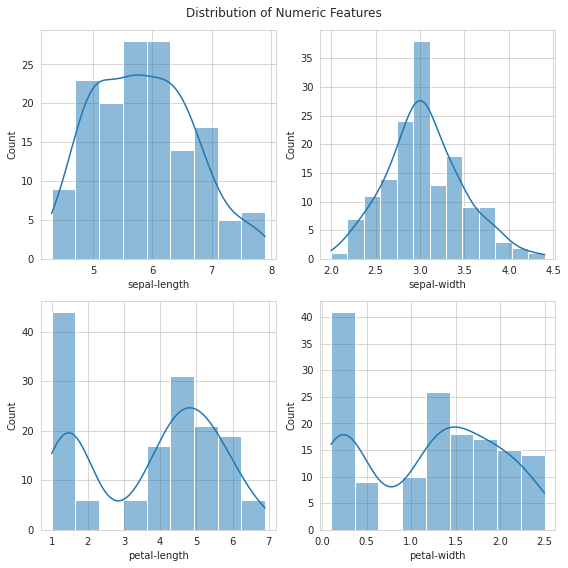

In [22]:
# Creating a list for the numeric features
nmr_features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

# Plotting the distribution
fig, axes = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Distribution of Numeric Features')
sb.histplot(ax=axes[0,0], x=dataset[nmr_features[0]], kde=True)
sb.histplot(ax=axes[0,1], x=dataset[nmr_features[1]], kde=True)
sb.histplot(ax=axes[1,0], x=dataset[nmr_features[2]], kde=True)
sb.histplot(ax=axes[1,1], x=dataset[nmr_features[3]], kde=True)
plt.tight_layout()
plt.show()

In [23]:
from statsmodels.graphics.gofplots import qqplot

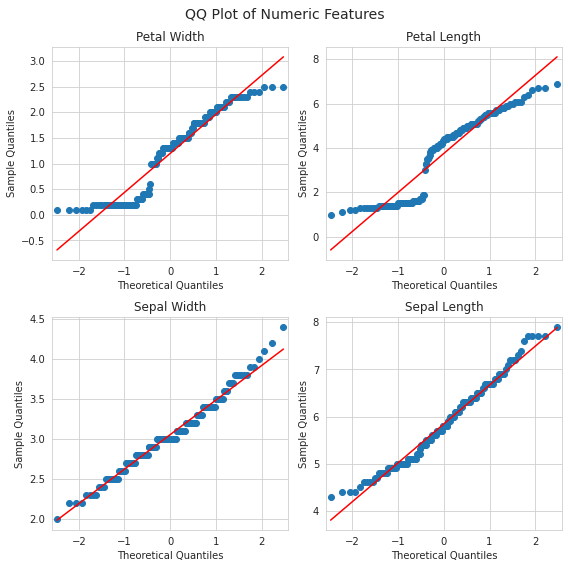

In [24]:
# Plotting to check if the numerical features are close to Gaussian distribution 
fig, axes = plt.subplots(2,2, figsize=(8,8))
qqplot(dataset['petal-width'], line ='s', ax=axes[0,0])
axes[0,0].set_title('Petal Width')
qqplot(dataset['petal-length'], line ='s', ax=axes[0,1])
axes[0,1].set_title('Petal Length')

qqplot(dataset['sepal-width'], line ='s', ax=axes[1,0])
axes[1,0].set_title('Sepal Width')
qqplot(dataset['sepal-length'], line ='s', ax=axes[1,1])
axes[1,1].set_title('Sepal Length')
fig.suptitle('QQ Plot of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
# Before moving forward with outlier detection and transformation
# first we'll split the dataset into train and test sets not to cause
# any data leakage

from sklearn.model_selection import train_test_split

x = dataset.drop('Class', axis=1)
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101, stratify=y)

### Creating Baseline

We'll check the baseline as prediction performance of the model wihtout data wrangling, to see if there is any space the improve the performance.

In [26]:
model = GaussianNB()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 96.67%


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



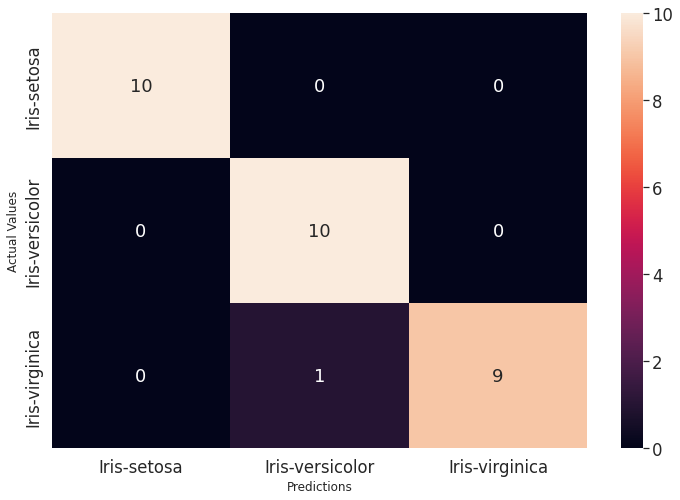

In [29]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

### 🔎 Results
As you can see the prediction we manage to generate pretty descent accuracy score which is almost 97%. As we mentioned earlier, if the real-valued features are in Gaussian distribution, then the performance of the model might increase. That's why we'll check the model by transforming the `petal` features which are not as close to Gaussian distribution as `sepal` features.

In [30]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (120). n_quantiles is set to n_samples.
  warnings.warn(


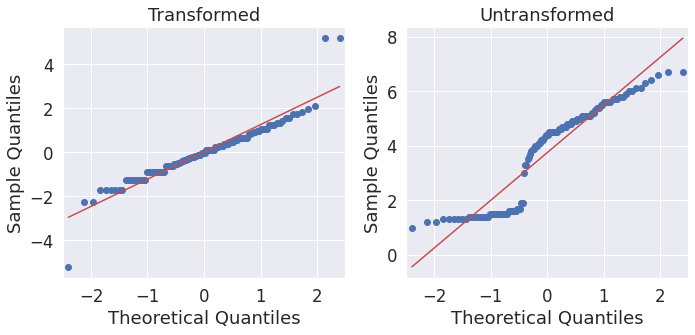

In [31]:
# Transforming petal-length using QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')
x_train['petal-length-tr'] = transformer.fit_transform(x_train['petal-length'].values.reshape(-1,1))

fig, axes = plt.subplots(1,2, figsize=(10,5))
qqplot(x_train['petal-length-tr'], line ='s', ax=axes[0])
axes[0].set_title('Transformed')
qqplot(x_train['petal-length'], line ='s', ax=axes[1])
axes[1].set_title('Untransformed')
plt.tight_layout()
plt.show()

In [32]:
# Checking the impact of transformation on the model
model = GaussianNB()
model.fit(x_train.drop('petal-length', axis=1), y_train)
x_test['petal-length-tr'] = x_test['petal-length']
y_hat = model.predict(x_test.drop('petal-length', axis=1))
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 66.67%


🔎 **Observation:** As you can see, transforming the `petal-length` made negative impact on the model. Let's see how `PowerTransformer` will have impact on the model.

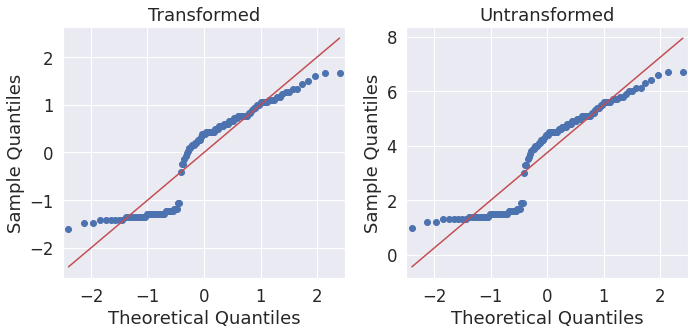

In [33]:
transformer = PowerTransformer(method='box-cox')
x_train['petal-length-tr'] = transformer.fit_transform(x_train['petal-length'].values.reshape(-1,1))

fig, axes = plt.subplots(1,2, figsize=(10,5))
qqplot(x_train['petal-length-tr'], line ='s', ax=axes[0])
axes[0].set_title('Transformed')
qqplot(x_train['petal-length'], line ='s', ax=axes[1])
axes[1].set_title('Untransformed')
plt.tight_layout()
plt.show()

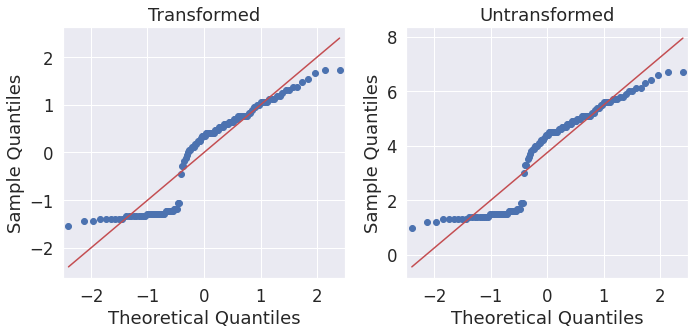

In [34]:
transformer = PowerTransformer(method='yeo-johnson')
x_train['petal-length-tr'] = transformer.fit_transform(x_train['petal-length'].values.reshape(-1,1))

fig, axes = plt.subplots(1,2, figsize=(10,5))
qqplot(x_train['petal-length-tr'], line ='s', ax=axes[0])
axes[0].set_title('Transformed')
qqplot(x_train['petal-length'], line ='s', ax=axes[1])
axes[1].set_title('Untransformed')
plt.tight_layout()
plt.show()

🔎 **Observarion:** As you can see niether `box-cox` nor `yeo-johnson` methods haven't changed the distribution of `petal-length` feature. That's why, there is no need to reevaluate the model with the transformed feature. 

## References

[1] [Master Machine Learning Algorithms](https://machinelearningmastery.com/master-machine-learning-algorithms/)

[2] [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)